In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Gather

In [2]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open ('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)  

predictions_df=pd.read_csv('image-predictions.tsv', sep='\t')
predictions_df.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [3]:
tweets_df=pd.read_csv('twitter-archive-enhanced.csv')
tweets_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = tweets_df.tweet_id.values
len(tweet_ids)
fail=[]
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError :
            fail.append(str(tweet_id))
            pass

In [5]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
data=json.loads(json.dumps(tweets))

In [6]:
counts_list=[]
for i in range (len(tweets)-1):
    id=data[i]['id']
    retweets=data[i]['retweet_count']
    favorites=data[i]['favorite_count']
    counts_list.append({'tweet_id':id,
                       'retweets':retweets,
                       'favorites':favorites})
tweets_info=pd.DataFrame(counts_list,columns = ['tweet_id', 'retweets', 'favorites'])
tweets_info.head(3)

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


# Assess

In [7]:
tweets_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweets_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
Toby           7
an             7
Bailey         7
Rusty          6
Milo           6
Stanley        6
Dave           6
Bella          6
Jack           6
Jax            6
Oscar          6
Scout          6
Koda           6
Leo            6
Gus            5
            ... 
Alexander      1
Ralphé         1
Furzey         1
Strudel        1
Mona           1
Ralpher        1
Shooter        1
Daniel         1
Pinot          1
Tebow          1
Lili           1
Naphaniel      1
Jockson        1
Tiger          1
Geno           1
Huxley         1
Timmy          1
Pluto          1
Bloop          1
Linus          1
Dixie          1
Bobbay         1
Bert           1
Ivar           1
Taco           1
Horace         1
Cannon         1
Fiji          

In [10]:
tweets_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tidiness problems:
**1-The 4 dog stages should be one variable** <br>
**2-There should be 1 dataframe that combine the tweets info and the archive and the predictions** <br>
### Quality problems:
**3-timestamp is string** <br>
**4-tweet_id is int** <br>
**5-in_reply_to_user_id,in_reply_to_status_id,retweeted_status_id,retweeted_status_user_id are float** <br>
**6-Some ratings are incorrect** <br>
**7-Some names are incorrect** <br>
**8-Keep only original tweets** <br>
**9-Drop some columns that are not needed** <br>
**10-There are some deleted tweets** <br>
**11-Ratings should be float**<br>
**12-p1,p2,p3 have variety of formatting**

# Clean

In [13]:
tweets=tweets_df.copy()
predictions=predictions_df.copy()
tweets2=tweets_info.copy()

**define #1** <br>
The pupper, puppo, doggo, and floofer are one variable which is the stage. We will make it using loop instead of melting because melting will require another cleaning for the duplicates and this is shorter. <br> <br>
**Code #1**

In [14]:
stages_list = []
a = ['pupper', 'puppo', 'doggo', 'floofer']

for text in tweets['text']:
    
    for word in a:
        if word in text:
            stages_list.append(word)
            break
    else:
        stages_list.append('None')

tweets['stage'] = stages_list
tweets=tweets.drop(a, axis=1)

**Test #1**

In [15]:
tweets.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


**Define #2** <br>
There should be one dataframe that represent one observation which is the tweets. use merge <br><br>
**Code #2**

In [16]:
tweets= pd.merge(tweets,tweets2,on ='tweet_id')
tweets=pd.merge(tweets,predictions,on='tweet_id')

**Test #2**

In [17]:
tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


**Define #3** <br>
timestamp variable should be datetime not string <br><br>
**Code #3**

In [18]:
tweets.timestamp=pd.to_datetime(tweets.timestamp)

**Test #3**

In [19]:
tweets.timestamp.dtype

dtype('<M8[ns]')

**Define #4** <br>
tweet_id should be string not integer <br><br>
**Code #4**

In [20]:
tweets.tweet_id=tweets.tweet_id.astype(str)

**Test #4**

In [21]:
tweets.tweet_id.dtype

dtype('O')

**Define #5** <br>
in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, and retweeted_status_user_id are all float and they should be string <br><br>
**Code #5**

In [22]:
tweets.in_reply_to_status_id= tweets.in_reply_to_status_id.fillna(-1)
tweets.in_reply_to_status_id= tweets.in_reply_to_status_id.astype(int)
tweets.in_reply_to_status_id= tweets.in_reply_to_status_id.astype(str)
tweets.in_reply_to_status_id= tweets.in_reply_to_status_id.replace('-1',np.nan)

In [23]:
tweets.in_reply_to_user_id= tweets.in_reply_to_user_id.fillna(-1)
tweets.in_reply_to_user_id= tweets.in_reply_to_user_id.astype(int)
tweets.in_reply_to_user_id= tweets.in_reply_to_user_id.astype(str)
tweets.in_reply_to_user_id= tweets.in_reply_to_user_id.replace('-1',np.nan)

In [24]:
tweets.retweeted_status_id= tweets.retweeted_status_id.fillna(-1)
tweets.retweeted_status_id= tweets.retweeted_status_id.astype(int)
tweets.retweeted_status_id= tweets.retweeted_status_id.astype(str)
tweets.retweeted_status_id= tweets.retweeted_status_id.replace('-1',np.nan)

In [25]:
tweets.retweeted_status_user_id= tweets.retweeted_status_user_id.fillna(-1)
tweets.retweeted_status_user_id= tweets.retweeted_status_user_id.astype(int)
tweets.retweeted_status_user_id= tweets.retweeted_status_user_id.astype(str)
tweets.retweeted_status_user_id= tweets.retweeted_status_user_id.replace('-1',np.nan)

**Test #5**

In [26]:
tweets.in_reply_to_user_id.dtype

dtype('O')

In [27]:
tweets.retweeted_status_id.dtype

dtype('O')

In [28]:
tweets.retweeted_status_user_id.dtype

dtype('O')

In [29]:
tweets.in_reply_to_status_id.dtype

dtype('O')

**Define #6** <br>
after assessin some of the tweets we saw that this account rate dogs on base of 10 and from 10 to 14, so we will keep rating with denominator 10 and numerator between 10 and 14<br><br>
**Code #6**

In [30]:
tweets=tweets[tweets.rating_denominator==10]
tweets=tweets[tweets.rating_numerator<15]
tweets=tweets[tweets.rating_numerator>9]

**Test #6**

In [31]:
tweets[tweets.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
tweets[tweets.rating_numerator>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
tweets[tweets.rating_numerator<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define #7** <br>
Some dogs have incorrect names like 'a','an', or 'the' . We will substitute these with 'None' <br><br>
**Code #7**

In [34]:
not_names=[]
for name in tweets.name:
    if name[0].islower():
        not_names.append(name)
not_names=set(not_names)
not_names

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'light',
 'my',
 'not',
 'officially',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'very'}

In [35]:
for word in not_names:
    tweets.name=tweets.name.replace(word,'None')

**Test #7**

In [36]:
not_names=[]
for name in tweets.name:
    if name[0].islower():
        not_names.append(name)
not_names=set(not_names)
not_names

set()

**Define #8** <br>
Keep only original tweets, that is remove all rows where retweeted_status_user_id,retweeted_status_id,in_reply_to_status_id, and in_reply_to_user_id is not null <br><br>
**Code #8**

In [37]:
tweets=tweets[tweets.retweeted_status_id.isnull()]
tweets=tweets[tweets.in_reply_to_status_id.isnull()]

**Test #8**

In [38]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2067
Data columns (total 27 columns):
tweet_id                      1541 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1541 non-null datetime64[ns]
source                        1541 non-null object
text                          1541 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1541 non-null object
rating_numerator              1541 non-null int64
rating_denominator            1541 non-null int64
name                          1541 non-null object
stage                         1541 non-null object
retweets                      1541 non-null int64
favorites                     1541 non-null int64
jpg_url                       1541 non-null object
img_num                       1541 no

**Define #9** <br>
Drop columns that are not needed <br><br>
**Code #9**

In [39]:
drop_columns=['retweeted_status_user_id','retweeted_status_id',
              'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp']
tweets=tweets.drop(drop_columns,axis=1)

**Test #9**

In [40]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2067
Data columns (total 22 columns):
tweet_id              1541 non-null object
timestamp             1541 non-null datetime64[ns]
source                1541 non-null object
text                  1541 non-null object
expanded_urls         1541 non-null object
rating_numerator      1541 non-null int64
rating_denominator    1541 non-null int64
name                  1541 non-null object
stage                 1541 non-null object
retweets              1541 non-null int64
favorites             1541 non-null int64
jpg_url               1541 non-null object
img_num               1541 non-null int64
p1                    1541 non-null object
p1_conf               1541 non-null float64
p1_dog                1541 non-null bool
p2                    1541 non-null object
p2_conf               1541 non-null float64
p2_dog                1541 non-null bool
p3                    1541 non-null object
p3_conf               1541 non-n

**Define #10** <br>
There are some tweets that got deleted but these were already removed when we perfomed inner merge.

**Test #10**

In [41]:
for id in fail:
    tweets[tweets['tweet_id']==id]

**Define #11** <br>
convert ratings to float <br><br>
**Code #11**

In [42]:
tweets.rating_denominator=tweets.rating_denominator.astype(float)
tweets.rating_numerator=tweets.rating_numerator.astype(float)

**Test #11**

In [43]:
tweets.rating_denominator.dtype

dtype('float64')

In [44]:
tweets.rating_numerator.dtype

dtype('float64')

**Define #12** <br>
We will capitalize the first letter of p1,p2,and p3 do that we make it consistent and easy to access  <br><br>
**Code #12**

In [45]:
tweets.p1=[row.capitalize() for row in tweets.p1]
tweets.p2=[row.capitalize() for row in tweets.p2]
tweets.p3=[row.capitalize() for row in tweets.p2]

**Test #11**

In [46]:
tweets.p1.value_counts()

Golden_retriever                  127
Labrador_retriever                 83
Pembroke                           83
Chihuahua                          62
Chow                               41
Pug                                40
Samoyed                            39
Pomeranian                         37
Toy_poodle                         32
Malamute                           26
Cocker_spaniel                     25
Chesapeake_bay_retriever           20
French_bulldog                     20
Eskimo_dog                         18
Siberian_husky                     18
German_shepherd                    17
Miniature_pinscher                 17
Cardigan                           16
Staffordshire_bullterrier          16
Rottweiler                         14
Shih-tzu                           14
Teddy                              14
Web_site                           14
Shetland_sheepdog                  13
Beagle                             13
Maltese_dog                        13
Kuvasz      

**Saving dataframes to CSV**

In [47]:
tweets.to_csv('twitter_archive_master.csv',index=False)

# Insights and visualizations

**Average rating, retweets, and favorites**

In [48]:
print(tweets.retweets.mean())
print(tweets.favorites.mean())
print(tweets.rating_numerator.mean())

3261.59117456
10619.0201168
11.4114211551


**Histogram of rating**

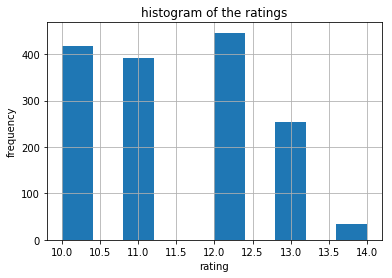

In [49]:
tweets['rating_numerator'].hist();
plt.title('histogram of the ratings');
plt.xlabel('rating');
plt.ylabel('frequency');

**Pie chart of dog stages**

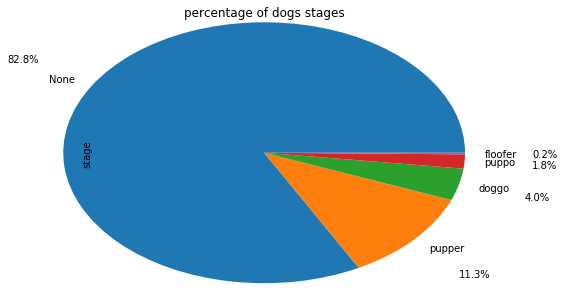

In [50]:
tweets.stage.value_counts().plot(kind='pie',autopct='%1.1f%%',pctdistance=1.4, labeldistance=1.1,radius=1.5);
plt.title('percentage of dogs stages',y=1.1);

**Top 10 names of dogs** 

In [51]:
tweets.name.value_counts()[1:12]

Charlie    11
Lucy       10
Oliver      9
Cooper      9
Tucker      8
Sadie       7
Winston     7
Penny       7
Daisy       6
Bo          6
Koda        6
Name: name, dtype: int64

**Relation between the rating of a dog and the number of retweets**

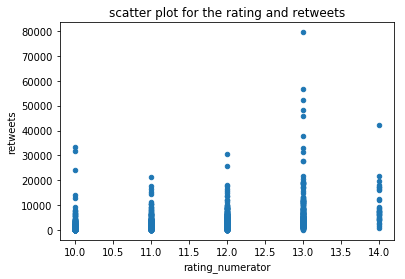

In [52]:
tweets.plot(y='retweets',x='rating_numerator',kind='scatter');
plt.title('scatter plot for the rating and retweets');

It looks that there is a positive relation between the rating and retweets

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0